In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
Housing_df=pd.read_csv('D:/Akshay/simpli/machine learning/Machine_Learning_Projects/Projects/Projects for submission/California Housing Price Prediction/Dataset for the project/housing.csv')

In [3]:
print(Housing_df.shape)

(20640, 10)


In [4]:
print(Housing_df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200  


In [5]:
Housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [6]:
Housing_df.total_bedrooms=Housing_df.total_bedrooms.fillna(np.mean(Housing_df.total_bedrooms))

In [7]:
Housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
X = Housing_df.iloc [:,:-1]
Y = Housing_df.iloc [:,-1]

In [9]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [10]:
Y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

In [11]:
categorical_columns = ['ocean_proximity']

In [12]:
X_labelencoder = LabelEncoder()
X[categorical_columns] = X_labelencoder.fit_transform(X[categorical_columns])
print (X).head()

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  
0         322         126         8.3252                3  
1        2401        1138         8.3014                3  
2         496         177         7.2574                3  
3         558         219         5.6431                3  
4         565         259         3.8462                3  


D:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, 
                                                     random_state = 0)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 9)
(4128, 9)
(16512,)
(4128,)


In [15]:
independent_scalar = StandardScaler()
X_train = independent_scalar.fit_transform (X_train)
X_test = independent_scalar.transform (X_test)
print(X_train)

[[ 1.00389865 -0.8400624  -1.79507596 ... -1.1356496   0.19001247
  -0.11814798]
 [-1.43477229  0.98536392  1.85553889 ... -0.13688171  0.26931072
   1.28686421]
 [ 0.77948108 -0.8400624  -0.20785212 ... -0.34343319  0.02989505
  -0.82065408]
 ...
 [-1.1654712   0.44709718  0.18895385 ... -0.27806879 -0.35589721
   1.98937031]
 [ 0.81439048 -0.93835459  0.42703742 ... -0.08197562  0.92053182
  -0.82065408]
 [ 1.99632302 -1.32216217 -1.08082523 ... -0.52645348 -1.30490629
  -0.11814798]]


In [16]:
import statsmodels.api as sm
from scipy.stats import t

D:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
lreg = sm.OLS(Y_train,X_train).fit()

In [18]:
lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     327.5
Date:                Sat, 16 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:46:59   Log-Likelihood:            -2.2645e+05
No. Observations:               16512   AIC:                         4.529e+05
Df Residuals:                   16503   BIC:                         4.530e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -8.513e+04   5243.571    -16.235      0.000   -9.54e+04   -7.48e+04
x2         -9.031e+04   5172.880    -17.459      0.000      -1e+05   -8.02e+04
x3           1.45e+04   1914.149      7.575      0.000    1.07e+04    1.83e+04
x4         -1.361e+04   6016.991     -2.262      0.024   -2.54e+04   -1814.442
x5          3.221e+04   8795.952      3.662      0.000     1.5e+04    4.95e+04
x6         -4.483e+04   4257.567    -10.530      0.000   -5.32e+04   -3.65e+04
x7          3.067e+04   8954.552      3.425      0.001    1.31e+04    4.82e+04
x8          7.585e+04   2227.147     34.056      0.000    7.15e+04    8.02e+04
x9           326.6858   1830.471      0.178      0.858   -3261.234    3914.605
==============================================================================
Omnibus:                     3997.672   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15363.856
Skew:                           1.166   Prob(JB):                         0.00
Kurtosis:                       7.110   Cond. No.                         14.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X = Housing_df.drop(['total_bedrooms','median_house_value'], axis=1)
print(X.head())

   longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                  41          880         322   
1    -122.22     37.86                  21         7099        2401   
2    -122.24     37.85                  52         1467         496   
3    -122.25     37.85                  52         1274         558   
4    -122.25     37.85                  52         1627         565   

   households  median_income ocean_proximity  
0         126         8.3252        NEAR BAY  
1        1138         8.3014        NEAR BAY  
2         177         7.2574        NEAR BAY  
3         219         5.6431        NEAR BAY  
4         259         3.8462        NEAR BAY  


In [20]:
X_labelencoder = LabelEncoder()
X[categorical_columns] = X_labelencoder.fit_transform(X[categorical_columns])
print (X).head()

   longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                  41          880         322   
1    -122.22     37.86                  21         7099        2401   
2    -122.24     37.85                  52         1467         496   
3    -122.25     37.85                  52         1274         558   
4    -122.25     37.85                  52         1627         565   

   households  median_income  ocean_proximity  
0         126         8.3252                3  
1        1138         8.3014                3  
2         177         7.2574                3  
3         219         5.6431                3  
4         259         3.8462                3  


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2,random_state = 0)

In [22]:
lreg2 = sm.OLS(Y_train,X_train).fit()
lreg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                 1.886e+04
Date:                Sat, 16 Jun 2018   Prob (F-statistic):               0.00
Time:                        09:47:09   Log-Likelihood:            -2.0868e+05
No. Observations:               16512   AIC:                         4.174e+05
Df Residuals:                   16504   BIC:                         4.174e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
longitude          -2564.2039    119.673    -21.427      0.000   -2798.776   -2329.631
latitude           -9462.2116    382.313    -24.750      0.000   -1.02e+04   -8712.837
housing_median_age  1678.6996     50.310     33.367      0.000    1580.086    1777.313
total_rooms          -10.6084      0.800    -13.253      0.000     -12.177      -9.039
population           -40.7430      1.238    -32.898      0.000     -43.171     -38.316
households           195.4776      5.093     38.384      0.000     185.495     205.460
median_income        4.42e+04    354.923    124.543      0.000    4.35e+04    4.49e+04
ocean_proximity     6018.6350    419.156     14.359      0.000    5197.045    6840.225
==============================================================================
Omnibus:                     3492.935   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11735.695
Skew:                           1.059   Prob(JB):                         0.00
Kurtosis:                       6.545   Cond. No.                     2.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
model = LinearRegression(n_jobs = -1)
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [24]:
print(model.intercept_)
print(model.coef_)

-3494082.0014111833
[-4.19057027e+04 -4.20850016e+04  1.13521154e+03 -1.45517146e+00
 -4.22118446e+01  1.45070120e+02  3.84281321e+04  3.01686983e+02]


In [25]:
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

In [26]:
pred_test

array([210871.5988486 , 284152.47745141, 192720.45538445, ...,
        82505.09827686, 280613.76460195, 205213.97951731])

In [27]:
print(sqrt(mean_squared_error(Y_train, pred_train)))

69893.6935731


In [28]:
print(sqrt(mean_squared_error(Y_test, pred_test)))

70273.5890305


In [29]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(max_depth = 10,min_samples_leaf = 4,min_samples_split = 3)  
regressor.fit(X_train, Y_train) 
print(sqrt(mean_squared_error(Y_test, regressor.predict(X_test))))

57596.7069179


In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_depth=10,min_samples_leaf=4,min_samples_split=3)  
regressor.fit(X_train,Y_train) 
print(sqrt(mean_squared_error(Y_test, regressor.predict(X_test))))

53451.8170783


In [31]:
X_med=(Housing_df['median_income'].values).reshape(-1, 1)
X_med

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

In [32]:
Y=(Housing_df['median_house_value'].values).reshape(-1, 1)

In [33]:
X_train_med, X_test_med, Y_train_med, Y_test_med = train_test_split (X_med, Y, test_size = 0.2, 
                                                     random_state = 0)

In [34]:
model = LinearRegression(n_jobs = -1)
model.fit(X_train_med,Y_train_med)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [35]:
print(model.intercept_)
print(model.coef_)

[44320.63522766]
[[42032.17769894]]


In [36]:
pred_train_med = model.predict(X_train_med)
pred_test_med = model.predict(X_test_med)

In [37]:
print(sqrt(mean_squared_error(Y_test_med, pred_test_med)))

84941.0515241


In [38]:
from matplotlib import pyplot as plt

Text(0,0.5,u'train predictions')

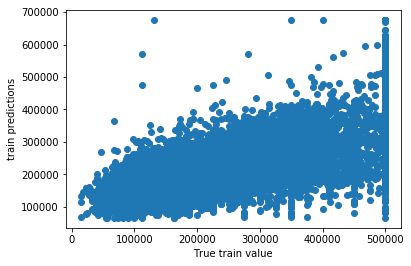

In [39]:
plt.scatter(Y_train_med, pred_train_med)
plt.xlabel("True train value")
plt.ylabel("train predictions")

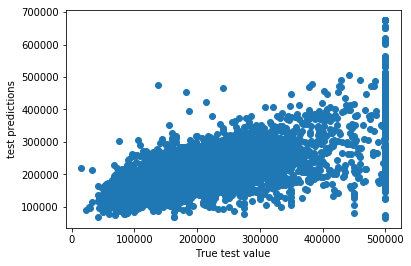

In [40]:
plt.scatter(Y_test_med, pred_test_med)
plt.xlabel("True test value")
plt.ylabel("test predictions")
plt.show()

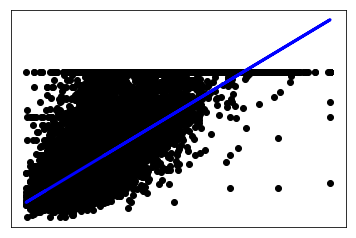

In [41]:
plt.scatter(X_train_med, Y_train_med,  color='black')
plt.plot(X_train_med, pred_train_med, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

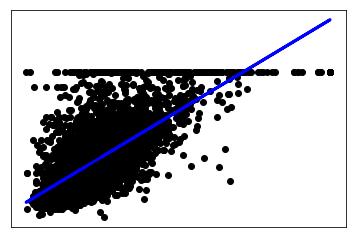

In [42]:
plt.scatter(X_test_med, Y_test_med,  color='black')
plt.plot(X_test_med, pred_test_med, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()